# Quantum Phase Estimation

Sources: 
- https://quantumcomputing.stackexchange.com/questions/2324/what-is-the-actual-power-of-quantum-phase-estimation

### 5-Qubit Implementation, as requested in HW

In [1]:
#initialization
import qiskit
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram
print("Imports Complete")

Imports Complete


In [2]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [3]:
def run_qft(u, gate_rotation_theta, qubit_count):
    # Create and set up circuit
    qpe3 = QuantumCircuit(qubit_count+1, qubit_count)

    # Apply H-Gates to counting qubits:
    for qubit in range(qubit_count):
        qpe3.h(qubit)

    # Prepare our eigenstate |psi>:
    theta, phi, lamb = u
    qpe3.u(theta, phi, lamb, qubit_count)

    # Do the controlled-U operations:
    angle = gate_rotation_theta
    for counting_qubit in range(qubit_count):
        for i in range(2 ** counting_qubit):
            qpe3.cp(angle, counting_qubit, qubit_count);

    # Do the inverse QFT:
    qft_dagger(qpe3, qubit_count)

    # Measure of course!
    qpe3.barrier()
    for n in range(qubit_count):
        qpe3.measure(n,n)

    return qpe3

Running on $\theta = 2\pi/3$ and $U = (\pi/2, \pi/2, \pi/2)$ where $\theta$ is the assumed input phase of $|\phi\rangle$ and $u$ is a gate applied to the target qubit to create $|\phi\rangle$.

$$U(\theta, \phi, \lambda) = 
\begin{bmatrix}
    \cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}} \\
    e^{i\phi}\sin{\frac{\theta}{2}} & e^{i\lambda+i\phi}\cos{\frac{\theta}{2}}
\end{bmatrix}
$$

Note that the second term, $\phi$, denotes the applied phase of the qubit. The other two terms exist only to explore other possible qubit states for testing, and should not effect measured results.

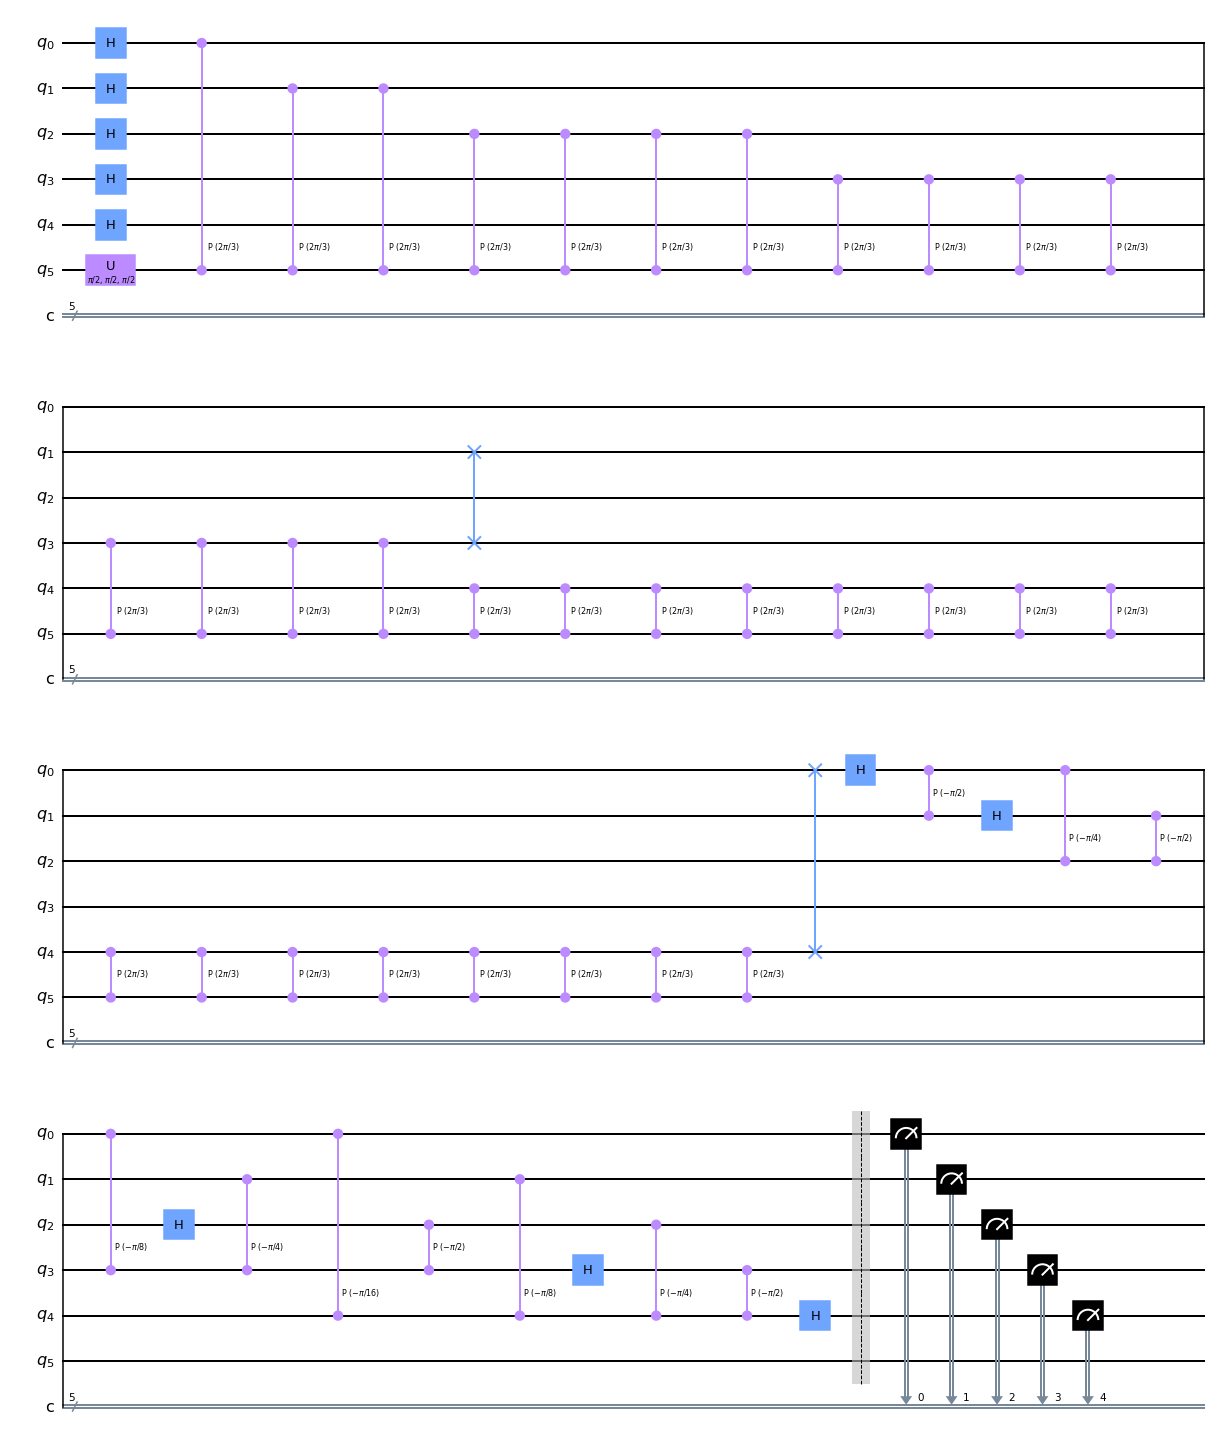

In [4]:
theta_assumed = 2 * pi / 3
u = (pi/2, pi/2, pi/2)
qubit_count = 5
qpe_circuit = run_qft(u, theta_assumed, qubit_count)
qpe_circuit.draw('mpl')

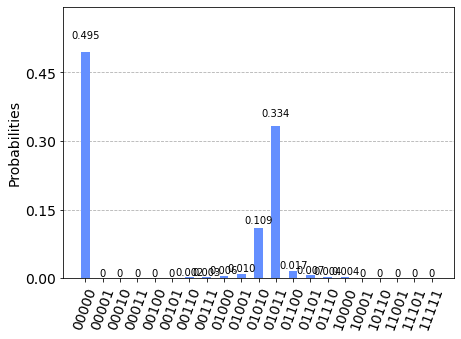

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qpe_circuit, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)